[View in Colaboratory](https://colab.research.google.com/github/sandroormeno/Tensorflow-basic-examples/blob/master/keras_Iris.ipynb)

In [0]:
import pandas
import numpy as np
import seaborn as sns
#from sklearn import datasets
from keras.utils import np_utils
from keras.models import Sequential
from sklearn.cross_validation import train_test_split
from keras.layers.core import Dense, Activation, Dropout


In [115]:
url = "https://raw.githubusercontent.com/sandroormeno/Tensorflow-basic-examples/master/datos/iris.csv"
datosIris = pandas.read_csv(url)
datosIris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


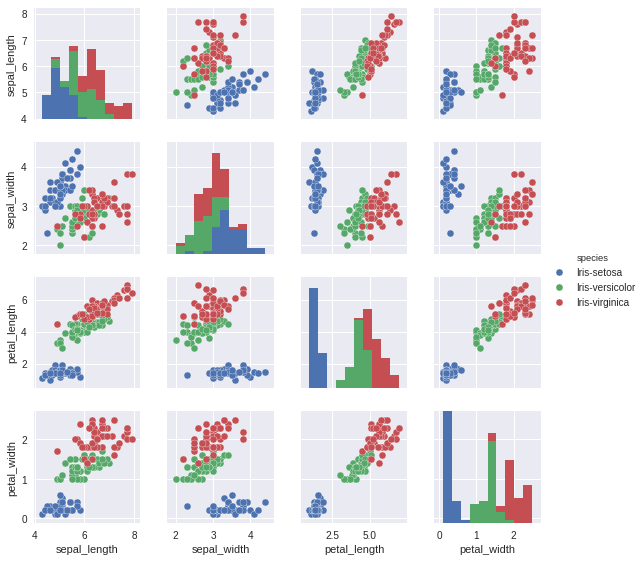

In [116]:
sns.pairplot(datosIris, hue='species', size=2)


In [0]:
#datosIris.values[:,4]

In [0]:
datos=datosIris.values[:,:4]
etiquetas=datosIris.values[:,4]

In [0]:
X_train,X_test,y_train,y_test=train_test_split(datos,etiquetas,train_size=0.5,random_state=1)

In [0]:
def one_hot(arr):
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))
y_train_ohe=one_hot(y_train)
y_test_ohe=one_hot(y_test)

In [131]:
#y_test_ohe[:5]
print (y_test[24])

Iris-virginica


In [120]:
model=Sequential()

model.add(Dense(16,input_shape=(4,)))
model.add(Activation("sigmoid"))
model.add(Dense(3))
model.add(Activation("softmax"))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

model.fit(X_train,y_train_ohe,nb_epoch=100,batch_size=1,verbose=1)


Epoch 1/100
75/75 [==============================] - 1s 9ms/step - loss: 1.1227 - acc: 0.1467
Epoch 2/100
75/75 [==============================] - 0s 6ms/step - loss: 1.0910 - acc: 0.4133
Epoch 3/100
75/75 [==============================] - 0s 5ms/step - loss: 1.0621 - acc: 0.5333
Epoch 4/100
75/75 [==============================] - 0s 5ms/step - loss: 1.0347 - acc: 0.4800
Epoch 5/100
75/75 [==============================] - 0s 5ms/step - loss: 0.9959 - acc: 0.4800
Epoch 6/100
75/75 [==============================] - 0s 5ms/step - loss: 0.9471 - acc: 0.6533
Epoch 7/100
75/75 [==============================] - 0s 5ms/step - loss: 0.9021 - acc: 0.6667
Epoch 8/100
75/75 [==============================] - 0s 5ms/step - loss: 0.8570 - acc: 0.6667
Epoch 9/100
75/75 [==============================] - 0s 5ms/step - loss: 0.8169 - acc: 0.6800
Epoch 10/100
75/75 [==============================] - 0s 5ms/step - loss: 0.7770 - acc: 0.6933
Epoch 11/100
75/75 [==============================] - 0s 5m

In [122]:
loss, accuracy = model.evaluate(X_test, y_test_ohe, verbose=0)
print("Test accuracy : " + str(accuracy))

Test accuracy : 1.0


In [143]:
import random
def suerte(la_flor):
  el_dato = X_test[la_flor]
  print("Los datos extraídos de 'X-test' : " + str(el_dato))
  el_dato_reshape = el_dato.reshape((1,4))
  print("Pero los necesitamos de esta forma : " + str(el_dato_reshape))
  
  # esto es lo más importante
  
  resultado = model.predict(el_dato_reshape)
  
  
  print("El resultado de la predicción  : " + str(resultado))
  print("----->¡El resultado es incomprensible!<------")
  resultado_decodificado = np.argmax(resultado)
  print("La respuesta final tiene el indice del valor mayor :  " + str(resultado_decodificado))
  uniques, ids = np.unique(y_test, return_inverse=True)
  print("La flor, segundo el modelo es:  " + y_test[la_flor])
  print("----->¡Y cómo se que es cierto!<------")
  print("La flor, según la dataset es:  " + uniques[resultado_decodificado])
  print("----->Esta son las categorías:<------")
  print( uniques)

suerte(random.randint(0, 75))

Los datos extraídos de 'X-test' : [6.7 3.1 4.4 1.4]
Pero los necesitamos de esta forma : [[6.7 3.1 4.4 1.4]]
El resultado de la predicción  : [[0.01229086 0.9588904  0.02881886]]
----->¡El resultado es incomprensible!<------
La respuesta final tiene el indice del valor mayor :  1
La flor, segundo el modelo es:  Iris-versicolor
----->¡Y cómo se que es cierto!<------
La flor, según la dataset es:  Iris-versicolor
----->Esta son las categorías:<------
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
